In [6]:
import pandas as pd
import scipy.stats as stats

In [7]:
#importing data on mass shooting 1/1/2023-4/30/2023 in order to find mass shooting per state
# Then will import data aout the gun ownership and poverty rate per state to find any correlations (1/1/2023-4/30/2023) 
MS = pd.read_csv('2023 Mass Shooting Original.csv')

In [8]:
MS.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,2584808,"April 30, 2023",Louisiana,Lafayette,W Congress Ave and University Ave,1,5,NaN
1,2585253,"April 30, 2023",Alabama,Birmingham,800 block of 48th St N,0,4,NaN
2,2584772,"April 30, 2023",Kentucky,Paducah,505 S 8th St,0,4,NaN
3,2584779,"April 30, 2023",Oklahoma,Oklahoma City,3000 W Memorial Rd,1,3,NaN
4,2585718,"April 30, 2023",California,Mojave,15900 block of H St,4,0,NaN


In [9]:
# deleting null values
MS.isna().sum()

Incident ID         0
Incident Date       0
State               0
City Or County      0
Address             0
# Killed            0
# Injured           0
Operations        185
dtype: int64

In [10]:
#Dropping columns that I wont use
ms = MS.drop(['Incident ID', 'Address','Operations'], axis=1)

In [11]:
# Nass Shooting 2023 dataset after dropping 'Operations', 'Address','Incident ID'
ms.head(10)

,Incident Date,State,City Or County,# Killed,# Injured
0,"April 30, 2023",Louisiana,Lafayette,1,5
1,"April 30, 2023",Alabama,Birmingham,0,4
2,"April 30, 2023",Kentucky,Paducah,0,4
3,"April 30, 2023",Oklahoma,Oklahoma City,1,3
4,"April 30, 2023",California,Mojave,4,0
5,"April 30, 2023",Georgia,Athens,1,3
6,"April 30, 2023",Texas,Bryan,0,4
7,"April 30, 2023",Mississippi,Bay Saint Louis,2,4
8,"April 30, 2023",Massachusetts,Lawrence,1,5
9,"April 29, 2023",South Carolina,Columbia,0,9


In [12]:
ms.describe

<bound method NDFrame.describe of        Incident Date           State City Or County  # Killed  # Injured
0     April 30, 2023       Louisiana      Lafayette         1          5
1     April 30, 2023         Alabama     Birmingham         0          4
2     April 30, 2023        Kentucky        Paducah         0          4
3     April 30, 2023        Oklahoma  Oklahoma City         1          3
4     April 30, 2023      California         Mojave         4          0
..               ...             ...            ...       ...        ...
180  January 1, 2023        Illinois        Chicago         1          3
181  January 1, 2023         Florida  Miami Gardens         0          9
182  January 1, 2023  North Carolina         Durham         0          5
183  January 1, 2023    Pennsylvania      Allentown         0          4
184  January 1, 2023            Ohio       Columbus         1          4

[185 rows x 5 columns]>

In [13]:
# Checking how much mass shootings occured by state from January 1st 2023-April 30th 2023\n# Mass shooting is defined as a shooting where at least 3 people were injured or killed
ms['State'].value_counts()

Texas                   16
California              15
Louisiana               13
Florida                 13
North Carolina          12
Pennsylvania            10
Illinois                 8
Tennessee                8
Georgia                  8
New Jersey               7
Ohio                     6
New York                 6
Maryland                 6
South Carolina           5
Mississippi              5
District of Columbia     4
Alabama                  4
Minnesota                4
Missouri                 4
Colorado                 4
Kentucky                 3
Arkansas                 3
Arizona                  3
Michigan                 3
Virginia                 2
Wisconsin                2
Indiana                  2
Washington               2
Oklahoma                 1
Connecticut              1
Massachusetts            1
Hawaii                   1
Maine                    1
Oregon                   1
Utah                     1
Name: State, dtype: int64

In [14]:
#Adding a dataframe for the number of mass shootings per state
msTotal = ms['State'].value_counts().reset_index()

In [15]:
# Adding column names to new dataframe
msTotal.columns = ['State','# Shootings']

In [16]:
#preview of new dataframe with only States and total number of shootings
msTotal.head(10)

,State,# Shootings
0,Texas,16
1,California,15
2,Louisiana,13
3,Florida,13
4,North Carolina,12
5,Pennsylvania,10
6,Illinois,8
7,Tennessee,8
8,Georgia,8
9,New Jersey,7


In [17]:
#sorting in alphabetical order
sorted_list = msTotal.sort_values('State')
print(sorted_list)

                   State  # Shootings
16               Alabama            4
22               Arizona            3
21              Arkansas            3
1             California           15
19              Colorado            4
29           Connecticut            1
15  District of Columbia            4
3                Florida           13
8                Georgia            8
31                Hawaii            1
6               Illinois            8
26               Indiana            2
20              Kentucky            3
2              Louisiana           13
32                 Maine            1
12              Maryland            6
30         Massachusetts            1
23              Michigan            3
17             Minnesota            4
14           Mississippi            5
18              Missouri            4
9             New Jersey            7
11              New York            6
4         North Carolina           12
10                  Ohio            6
28          

In [18]:
#adding new rows for missing states they did not have mass shootings from 1/1/2023-4/30/2023
new_rows= ['Alaska','Delaware','Idaho','Iowa','Kansas','Montana','Nebraska','Nevada','New Hampshire','New Mexico','North Dakota','Rhode Island','South Dakota','Vermont','West Virginia','Wyoming']
ms_as = msTotal.append(pd.DataFrame({'State': new_rows}), ignore_index=True)
print(ms_as)


<ipython-input-18-4f82dc8579ad>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ms_as = msTotal.append(pd.DataFrame({'State': new_rows}), ignore_index=True)


                   State  # Shootings
0                  Texas         16.0
1             California         15.0
2              Louisiana         13.0
3                Florida         13.0
4         North Carolina         12.0
5           Pennsylvania         10.0
6               Illinois          8.0
7              Tennessee          8.0
8                Georgia          8.0
9             New Jersey          7.0
10                  Ohio          6.0
11              New York          6.0
12              Maryland          6.0
13        South Carolina          5.0
14           Mississippi          5.0
15  District of Columbia          4.0
16               Alabama          4.0
17             Minnesota          4.0
18              Missouri          4.0
19              Colorado          4.0
20              Kentucky          3.0
21              Arkansas          3.0
22               Arizona          3.0
23              Michigan          3.0
24              Virginia          2.0
25          

In [19]:
#changing null values to 0 for states that did not have mass shootings
ms_av = ms_as.fillna('0')
print(ms_av)

                   State # Shootings
0                  Texas        16.0
1             California        15.0
2              Louisiana        13.0
3                Florida        13.0
4         North Carolina        12.0
5           Pennsylvania        10.0
6               Illinois         8.0
7              Tennessee         8.0
8                Georgia         8.0
9             New Jersey         7.0
10                  Ohio         6.0
11              New York         6.0
12              Maryland         6.0
13        South Carolina         5.0
14           Mississippi         5.0
15  District of Columbia         4.0
16               Alabama         4.0
17             Minnesota         4.0
18              Missouri         4.0
19              Colorado         4.0
20              Kentucky         3.0
21              Arkansas         3.0
22               Arizona         3.0
23              Michigan         3.0
24              Virginia         2.0
25             Wisconsin         2.0
2

In [20]:
#removing District of Columbia because it is not a state and is not on the future datasets I will be combining with this one
ms_final = ms_av[ms_av['State'] != 'District of Columbia']
ms_final.sort_values('State')

,State,# Shootings
16,Alabama,4.0
35,Alaska,0
22,Arizona,3.0
21,Arkansas,3.0
1,California,15.0
19,Colorado,4.0
29,Connecticut,1.0
36,Delaware,0
3,Florida,13.0
8,Georgia,8.0


In [21]:
#importing csv that gives data on gun ownership per state (1/1/2023-4/30/2023)
go = pd.read_csv('Gun ownership by state 2023 Jan to April.csv')

In [22]:
#describe the data
go.head(10)

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,gunOwnership,totalGuns,rank
0,30,Montana,7.82919,1139507,1122867,1087075,1077309.0,989415,0.01482,16640,0.15170,0.663,22133,1
1,56,Wyoming,6.00743,583279,581381,577605,576207.1,563626,0.00326,1898,0.03487,0.662,132806,2
2,2,Alaska,1.28449,732984,733583,732923,730653.8,710231,-0.00082,-599,0.03204,0.645,15824,3
3,16,Idaho,23.88287,1973752,1939033,1849202,1821040.0,1567582,0.01791,34719,0.25911,0.601,49566,4
4,54,West Virginia,73.41651,1764786,1775156,1791420,1797577.4,1852994,-0.00584,-10370,-0.04760,0.585,35264,5
5,5,Arkansas,58.86715,3063152,3045637,3014195,3004367.3,2915918,0.00575,17515,0.05049,0.572,79841,6
6,28,Mississippi,62.45398,2930528,2940057,2958141,2959056.6,2967297,-0.00324,-9529,-0.01239,0.558,35494,7
7,1,Alabama,100.67620,5098746,5074296,5031362,5006199.4,4779736,0.00482,24450,0.06674,0.555,161641,8
8,46,South Dakota,12.18140,923484,909824,887799,880437.1,814180,0.01501,13660,0.13425,0.553,21130,9
9,38,North Dakota,11.31271,780588,779261,779518,768825.3,672591,0.00170,1327,0.16057,0.551,13272,10


In [23]:
#removing null values
go.isna().sum()

fips               0
state              0
densityMi          0
pop2023            0
pop2022            0
pop2020            0
pop2019            0
pop2010            0
growthRate         0
growth             0
growthSince2010    0
gunOwnership       0
totalGuns          0
rank               0
dtype: int64

In [24]:
#removing unecessary columns
gonew = go.drop(['densityMi', 'pop2023','pop2022','pop2020','pop2019','pop2010','growthRate','growth','growthSince2010','totalGuns','rank','fips'], axis=1)
print(gonew)

             state  gunOwnership
0          Montana         0.663
1          Wyoming         0.662
2           Alaska         0.645
3            Idaho         0.601
4    West Virginia         0.585
5         Arkansas         0.572
6      Mississippi         0.558
7          Alabama         0.555
8     South Dakota         0.553
9     North Dakota         0.551
10        Oklahoma         0.547
11        Kentucky         0.546
12       Louisiana         0.531
13       Tennessee         0.516
14          Oregon         0.508
15         Vermont         0.505
16  South Carolina         0.494
17         Georgia         0.492
18          Kansas         0.489
19        Missouri         0.488
20          Nevada         0.473
21           Maine         0.468
22            Utah         0.468
23         Arizona         0.463
24      New Mexico         0.462
25  North Carolina         0.458
26           Texas         0.457
27       Wisconsin         0.453
28        Nebraska         0.452
29        

In [25]:
#renaming column 'state' to 'State' so can join columns
goFinal = gonew.rename(columns={'state': 'State'})
goFinal.head(5)

,State,gunOwnership
0,Montana,0.663
1,Wyoming,0.662
2,Alaska,0.645
3,Idaho,0.601
4,West Virginia,0.585


In [26]:
msGo = pd.merge(ms_final,goFinal, on = 'State', how = 'outer')
msGo.describe

<bound method NDFrame.describe of              State # Shootings  gunOwnership
0            Texas        16.0         0.457
1       California        15.0         0.283
2        Louisiana        13.0         0.531
3          Florida        13.0         0.353
4   North Carolina        12.0         0.458
5     Pennsylvania        10.0         0.407
6         Illinois         8.0         0.278
7        Tennessee         8.0         0.516
8          Georgia         8.0         0.492
9       New Jersey         7.0         0.147
10            Ohio         6.0         0.400
11        New York         6.0         0.199
12        Maryland         6.0         0.302
13  South Carolina         5.0         0.494
14     Mississippi         5.0         0.558
15         Alabama         4.0         0.555
16       Minnesota         4.0         0.428
17        Missouri         4.0         0.488
18        Colorado         4.0         0.451
19        Kentucky         3.0         0.546
20        Arkansas   

In [27]:
#importing data on poverty rate per state for 1/1/2023-4/30/2023
pr= pd.read_csv('Poverty Rate by State data.csv')

In [28]:
pr.head(10)

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,PovertyRate,undefined,rank
0,28,Mississippi,62.45398,2930528,2940057,2958141,2959056.6,2967297,-0.00324,-9529,-0.01239,0.192607,564439,1
1,22,Louisiana,105.39265,4553384,4590241,4651664,4639834.8,4533372,-0.00803,-36857,0.00441,0.185627,845230,2
2,35,New Mexico,17.39527,2110011,2113344,2118390,2112468.9,2059179,-0.00158,-3333,0.02469,0.180580,381026,3
3,54,West Virginia,73.41651,1764786,1775156,1791420,1797577.4,1852994,-0.00584,-10370,-0.04760,0.170078,300152,4
4,21,Kentucky,114.42109,4518031,4512310,4507445,4490637.2,4339367,0.00127,5721,0.04117,0.158896,717895,5
5,5,Arkansas,58.86715,3063152,3045637,3014195,3004367.3,2915918,0.00575,17515,0.05049,0.153499,470190,6
6,11,District of Columbia,11062.54098,674815,671803,670868,663953.5,601723,0.00448,3012,0.12147,0.153214,103391,7
7,1,Alabama,100.67620,5098746,5074296,5031362,5006199.4,4779736,0.00482,24450,0.06674,0.149574,762642,8
8,40,Oklahoma,59.01851,4048375,4019800,3964912,3943555.9,3751351,0.00711,28575,0.07918,0.144631,585520,9
9,47,Tennessee,173.01630,7134327,7051339,6925619,6867667.6,6346105,0.01177,82988,0.12421,0.135291,965213,10


In [29]:
#checking for nullvalues
pr.isna().sum()

fips               0
state              0
densityMi          0
pop2023            0
pop2022            0
pop2020            0
pop2019            0
pop2010            0
growthRate         0
growth             0
growthSince2010    0
PovertyRate        0
undefined          0
rank               0
dtype: int64

In [30]:
#removing District of Columbia row since it is not a state
prstate = pr[pr['state'] != 'District of Columbia']

In [31]:
prstate.head(10)

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,PovertyRate,undefined,rank
0,28,Mississippi,62.45398,2930528,2940057,2958141,2959056.6,2967297,-0.00324,-9529,-0.01239,0.192607,564439,1
1,22,Louisiana,105.39265,4553384,4590241,4651664,4639834.8,4533372,-0.00803,-36857,0.00441,0.185627,845230,2
2,35,New Mexico,17.39527,2110011,2113344,2118390,2112468.9,2059179,-0.00158,-3333,0.02469,0.180580,381026,3
3,54,West Virginia,73.41651,1764786,1775156,1791420,1797577.4,1852994,-0.00584,-10370,-0.04760,0.170078,300152,4
4,21,Kentucky,114.42109,4518031,4512310,4507445,4490637.2,4339367,0.00127,5721,0.04117,0.158896,717895,5
5,5,Arkansas,58.86715,3063152,3045637,3014195,3004367.3,2915918,0.00575,17515,0.05049,0.153499,470190,6
7,1,Alabama,100.67620,5098746,5074296,5031362,5006199.4,4779736,0.00482,24450,0.06674,0.149574,762642,8
8,40,Oklahoma,59.01851,4048375,4019800,3964912,3943555.9,3751351,0.00711,28575,0.07918,0.144631,585520,9
9,47,Tennessee,173.01630,7134327,7051339,6925619,6867667.6,6346105,0.01177,82988,0.12421,0.135291,965213,10
10,45,South Carolina,178.70337,5372002,5282634,5131848,5081199.6,4625364,0.01692,89368,0.16142,0.135233,726470,11


In [32]:
#changing column 'state' to 'State' so it can be properly joined with other datasets
prcapital = prstate.rename(columns={'state':'State'})
prcapital.head(5)

,fips,State,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,PovertyRate,undefined,rank
0,28,Mississippi,62.45398,2930528,2940057,2958141,2959056.6,2967297,-0.00324,-9529,-0.01239,0.192607,564439,1
1,22,Louisiana,105.39265,4553384,4590241,4651664,4639834.8,4533372,-0.00803,-36857,0.00441,0.185627,845230,2
2,35,New Mexico,17.39527,2110011,2113344,2118390,2112468.9,2059179,-0.00158,-3333,0.02469,0.180580,381026,3
3,54,West Virginia,73.41651,1764786,1775156,1791420,1797577.4,1852994,-0.00584,-10370,-0.04760,0.170078,300152,4
4,21,Kentucky,114.42109,4518031,4512310,4507445,4490637.2,4339367,0.00127,5721,0.04117,0.158896,717895,5


In [33]:
#removing unnecessary columns
prfinal = prcapital.drop(['fips','densityMi','pop2022','pop2020','pop2019','pop2010','growthRate','growth','growthSince2010','undefined','rank'], axis=1)
prfinal.head(5)

,State,pop2023,PovertyRate
0,Mississippi,2930528,0.192607
1,Louisiana,4553384,0.185627
2,New Mexico,2110011,0.180580
3,West Virginia,1764786,0.170078
4,Kentucky,4518031,0.158896


In [34]:
#checking datatypes
prfinal.dtypes

State           object
pop2023          int64
PovertyRate    float64
dtype: object

In [35]:
#creating column for Poverty Population
prfinal['PovertyPopulation'] = prfinal['pop2023'] * prfinal['PovertyRate']
prfinal.head(5)

,State,pop2023,PovertyRate,PovertyPopulation
0,Mississippi,2930528,0.192607,564439.0
1,Louisiana,4553384,0.185627,845230.0
2,New Mexico,2110011,0.180580,381026.0
3,West Virginia,1764786,0.170078,300152.0
4,Kentucky,4518031,0.158896,717895.0


In [36]:
#joining Poverty dataset and mass shootings/gun ownership dataset
msGoPr = pd.merge(msGo, prfinal, on = 'State', how = 'outer')
msGoPr.describe

<bound method NDFrame.describe of              State # Shootings  gunOwnership   pop2023  PovertyRate  \
0            Texas        16.0         0.457  30500280     0.130630   
1       California        15.0         0.283  38915693     0.124717   
2        Louisiana        13.0         0.531   4553384     0.185627   
3          Florida        13.0         0.353  22661577     0.122363   
4   North Carolina        12.0         0.458  10832061     0.130348   
5     Pennsylvania        10.0         0.407  12931957     0.114478   
6         Illinois         8.0         0.278  12477595     0.119307   
7        Tennessee         8.0         0.516   7134327     0.135291   
8          Georgia         8.0         0.492  11037723     0.132416   
9       New Jersey         7.0         0.147   9255437     0.091050   
10            Ohio         6.0         0.400  11747774     0.131600   
11        New York         6.0         0.199  19496810     0.132383   
12        Maryland         6.0         0.30

In [37]:
msGoPr.head(5)

,State,# Shootings,gunOwnership,pop2023,PovertyRate,PovertyPopulation
0,Texas,16.0,0.457,30500280,0.130630,3984260.0
1,California,15.0,0.283,38915693,0.124717,4853434.0
2,Louisiana,13.0,0.531,4553384,0.185627,845230.0
3,Florida,13.0,0.353,22661577,0.122363,2772939.0
4,North Carolina,12.0,0.458,10832061,0.130348,1411939.0


In [38]:
#creating duplicate
msGoPrpercent = msGoPr.copy()
msGoPrpercent.head(3)

,State,# Shootings,gunOwnership,pop2023,PovertyRate,PovertyPopulation
0,Texas,16.0,0.457,30500280,0.130630,3984260.0
1,California,15.0,0.283,38915693,0.124717,4853434.0
2,Louisiana,13.0,0.531,4553384,0.185627,845230.0


In [39]:
#changing decimals to percentages

In [40]:
msGoPrpercent['gunOwnership'] = msGoPrpercent['gunOwnership'] * 100
msGoPrpercent['gunOwnership'] = msGoPrpercent['gunOwnership'].map('{:.2f}%'.format)
msGoPrpercent.head(3)

,State,# Shootings,gunOwnership,pop2023,PovertyRate,PovertyPopulation
0,Texas,16.0,45.70%,30500280,0.130630,3984260.0
1,California,15.0,28.30%,38915693,0.124717,4853434.0
2,Louisiana,13.0,53.10%,4553384,0.185627,845230.0


In [41]:
msGoPrpercent['PovertyRate'] = msGoPrpercent['PovertyRate'] * 100
msGoPrpercent['PovertyRate'] = msGoPrpercent['PovertyRate'].map('{:.2f}%'.format)
msGoPrpercent.head(3)

,State,# Shootings,gunOwnership,pop2023,PovertyRate,PovertyPopulation
0,Texas,16.0,45.70%,30500280,13.06%,3984260.0
1,California,15.0,28.30%,38915693,12.47%,4853434.0
2,Louisiana,13.0,53.10%,4553384,18.56%,845230.0


In [42]:
#changing column names 
msGoPrFinal = msGoPrpercent.rename(columns={'pop2023':'TotalPopulation'})
msGoPrFinal.head(5)

,State,# Shootings,gunOwnership,TotalPopulation,PovertyRate,PovertyPopulation
0,Texas,16.0,45.70%,30500280,13.06%,3984260.0
1,California,15.0,28.30%,38915693,12.47%,4853434.0
2,Louisiana,13.0,53.10%,4553384,18.56%,845230.0
3,Florida,13.0,35.30%,22661577,12.24%,2772939.0
4,North Carolina,12.0,45.80%,10832061,13.03%,1411939.0


In [43]:
#changing column names
MsGoPr= msGoPrFinal.rename(columns={'gunOwnership':'GunOwnership'})
MsGoPr.head(3)

,State,# Shootings,GunOwnership,TotalPopulation,PovertyRate,PovertyPopulation
0,Texas,16.0,45.70%,30500280,13.06%,3984260.0
1,California,15.0,28.30%,38915693,12.47%,4853434.0
2,Louisiana,13.0,53.10%,4553384,18.56%,845230.0


In [44]:
MsGoPr.dtypes

State                 object
# Shootings           object
GunOwnership          object
TotalPopulation        int64
PovertyRate           object
PovertyPopulation    float64
dtype: object

In [45]:
#changing datatypes to numeric
MsGoPr['# Shootings'] = pd.to_numeric(MsGoPr['# Shootings'])

In [46]:
MsGoPr['GunOwnership'] = pd.to_numeric(MsGoPr['GunOwnership'].str.replace('%',''))

In [47]:
MsGoPr['PovertyRate'] = pd.to_numeric(MsGoPr['PovertyRate'].str.replace('%',''))

In [48]:
MsGoPr.dtypes

State                 object
# Shootings          float64
GunOwnership         float64
TotalPopulation        int64
PovertyRate          float64
PovertyPopulation    float64
dtype: object

In [49]:
#had to change datatypes of percentages and remove '%' sign when noticing it would not work when plotting scatterplots

In [50]:
#importing library for scatterplots
import matplotlib.pyplot as plt

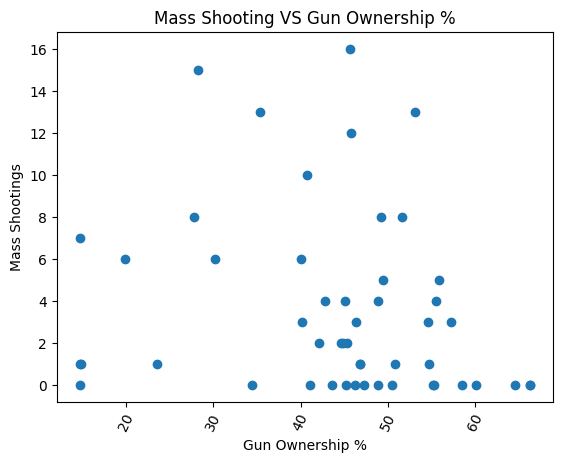

In [51]:
#import multplelocator
from matplotlib.ticker import MultipleLocator


#create scatterplot
#assign variables
X1 = MsGoPr['GunOwnership']
Y = MsGoPr['# Shootings']

#Create Scatterplot
plt.scatter(X1,Y)

#set labels
plt.xlabel('Gun Ownership %')
plt.ylabel('Mass Shootings')


#title
plt.title('Mass Shooting VS Gun Ownership %')


#rotate numbers in X axis
plt.xticks(rotation=65)

#display
plt.show()


In [55]:
#importing personr for correlation coefficient and p-value
from scipy.stats import pearsonr


In [57]:
#calculating p-value & correlation coefficient through PearsonR, significance level=.05
column1 = MsGoPr['# Shootings']
column2 = MsGoPr['GunOwnership']
correlation_coefficient, p_value = pearsonr(column1, column2)

print(f"Correlation coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")

Correlation coefficient: -0.20
P-value: 0.17


In [58]:
#Correlation coefficient of -.20 shows weak correlation since it is closer to 0. Having a negative value shows it is closer to having an negative correlation than postive 
#P-value of 0.17 is greater than the significance level of 0.05 its shows the correlation coefficient could have occured by chance and their is not enough evidence to show statistical significance 

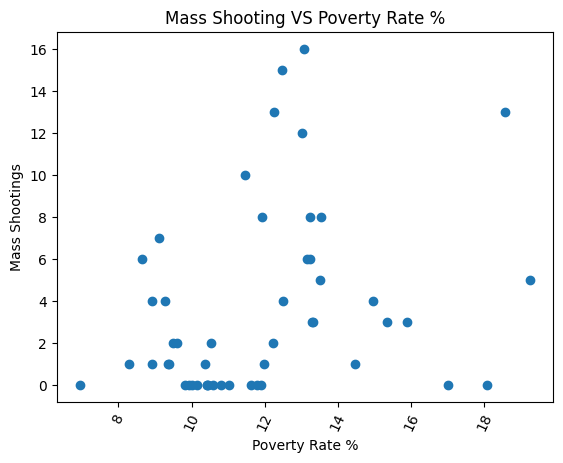

In [61]:
#create scatterplot for Mass Shootings VS Poverty Rate 
#assign variables
X2 = MsGoPr['PovertyRate']
Y = MsGoPr['# Shootings']

#Create Scatterplot
plt.scatter(X2,Y)

#set labels
plt.xlabel('Poverty Rate %')
plt.ylabel('Mass Shootings')


#title
plt.title('Mass Shooting VS Poverty Rate %')


#rotate numbers in X axis
plt.xticks(rotation=65)

#display
plt.show()


In [62]:
#calculating p-value & correlation coefficient through PearsonR, significance level=.05 for Mass Shootings VS Poverty Rate
column1 = MsGoPr['# Shootings']
column3 = MsGoPr['PovertyRate']
pr_correlation_coefficient, pr_p_value = pearsonr(column1, column3)

print(f"Correlation coefficient: {pr_correlation_coefficient:.2f}")
print(f"P-value: {pr_p_value:.2f}")

Correlation coefficient: 0.30
P-value: 0.04


In [63]:
#Correlation coefficient of .30 shows a weak postive correlation but is higher relative to the Gun Ownership correlation
#P-value of 0.04 which is lesss than the significance level of 0.05 shows that their is a level of statistical significance in the Correlation coefficient  

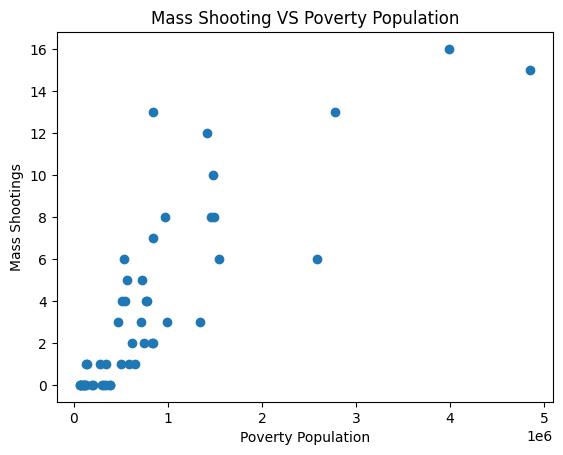

In [66]:
#create scatterplot for Mass Shootings VS Poverty Population 
#assign variables
X3 = MsGoPr['PovertyPopulation']
Y = MsGoPr['# Shootings']

#Create Scatterplot
plt.scatter(X3,Y)

#set labels
plt.xlabel('Poverty Population')
plt.ylabel('Mass Shootings')


#title
plt.title('Mass Shooting VS Poverty Population')


#rotate numbers in X axis
plt.xticks(rotation=0)

#display
plt.show()


In [73]:
#calculating p-value & correlation coefficient through PearsonR, significance level=.05 for Mass Shootings VS Poverty Population
column1 = MsGoPr['# Shootings']
column4 = MsGoPr['PovertyPopulation']
pp_correlation_coefficient, pp_p_value = pearsonr(column1, column4)

print(f"Correlation coefficient: {pp_correlation_coefficient:.2f}")
print(f"P-value: {pp_p_value:.15f}")

Correlation coefficient: 0.83
P-value: 0.000000000000089


In [74]:
#Correlation coefficient is 0.83 which is a strong positive correlation that is close to 1. This correlation was much higher than both the Poverty Rate and Gun Ownership Rate
#P-value of almost 0 which is less than the significance level .05 shows that their is a statistical significance in the Correlation coefficicent

In [75]:
#Conclusion

#The Poverty Population Correlation coefficient of 0.83 showed the strongest coefficient correlation between the Poverty Rate (.30) and Gun Ownership Rate (-.20).
#The Poverty Population also had the lowest P-value (0.0000000000000089) which shows it had the strongest statistical signficance between the Poverty Rate (0.04) and Gun Ownership Rate (0.17)
#It seems that as the Poverty Population reaches 500,000 people, the mass shootings begin to occur and increase
#This can pose many questions on why a person may commit a mass shootings when located in a area with a high poverty population such as:
#Can social disadvantage and marginalization cause hopelessness and frustration in a society?
#Could higher crime rate in areas with a high poverty population influence violent behaviors?
#What solutions can be done to help with the wealth gap and poverty in these areas?